# 6.4 Machine Learning

# Question 2: Importing libraries

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
# Ensuring that the graphs are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [48]:
path = '/Users/seanward/Desktop/6- Achievement'

In [49]:
# Import the recipes data.

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'full_grouped_edit3.csv'))

## Question 3: Data cleaning

In [50]:
df.columns

Index(['Unnamed: 0', 'Date', 'Country/Region', 'Confirmed', 'Deaths',
       'WHO Region_x', 'Population', 'Total Cases', 'Total Deaths',
       '% of Cases', '% of Cases that Die', '% of Population that Dies',
       '_merge', 'Cases Death Rate', 'Country Cases Death Rate',
       'country_flag'],
      dtype='object')

In [51]:
df.head(20)

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,WHO Region_x,Population,Total Cases,Total Deaths,% of Cases,% of Cases that Die,% of Population that Dies,_merge,Cases Death Rate,Country Cases Death Rate,country_flag
0,0,1/22/20,US,1,0,Americas,331198130,5032179,162804,1.519%,3.235%,0.049%,both,0.0,0.038662,Medium Death Rate
1,1,1/23/20,US,1,0,Americas,331198130,5032179,162804,1.519%,3.235%,0.049%,both,0.0,0.038662,Medium Death Rate
2,2,1/24/20,US,2,0,Americas,331198130,5032179,162804,1.519%,3.235%,0.049%,both,0.0,0.038662,Medium Death Rate
3,3,1/25/20,US,2,0,Americas,331198130,5032179,162804,1.519%,3.235%,0.049%,both,0.0,0.038662,Medium Death Rate
4,4,1/26/20,US,5,0,Americas,331198130,5032179,162804,1.519%,3.235%,0.049%,both,0.0,0.038662,Medium Death Rate
5,5,1/27/20,US,5,0,Americas,331198130,5032179,162804,1.519%,3.235%,0.049%,both,0.0,0.038662,Medium Death Rate
6,6,1/28/20,US,5,0,Americas,331198130,5032179,162804,1.519%,3.235%,0.049%,both,0.0,0.038662,Medium Death Rate
7,7,1/29/20,US,5,0,Americas,331198130,5032179,162804,1.519%,3.235%,0.049%,both,0.0,0.038662,Medium Death Rate
8,8,1/30/20,US,5,0,Americas,331198130,5032179,162804,1.519%,3.235%,0.049%,both,0.0,0.038662,Medium Death Rate
9,9,1/31/20,US,7,0,Americas,331198130,5032179,162804,1.519%,3.235%,0.049%,both,0.0,0.038662,Medium Death Rate


In [52]:
df.shape

(3078, 16)

In [53]:
# Renaming the columns

df.rename(columns = {'WHO Region_x' : 'WHO Region', 'Country/Region' : 'Country' }, inplace = True)

In [54]:
# Dropping columns that are not needed.

df = df.drop(columns = ['Unnamed: 0', 'Cases Death Rate' ])

In [55]:
df.info

<bound method DataFrame.info of          Date Country  Confirmed  Deaths WHO Region  Population  Total Cases  \
0     1/22/20      US          1       0   Americas   331198130      5032179   
1     1/23/20      US          1       0   Americas   331198130      5032179   
2     1/24/20      US          2       0   Americas   331198130      5032179   
3     1/25/20      US          2       0   Americas   331198130      5032179   
4     1/26/20      US          5       0   Americas   331198130      5032179   
...       ...     ...        ...     ...        ...         ...          ...   
3073  7/15/20  Turkey     215940    5419     Europe    84428331       237265   
3074  7/16/20  Turkey     216873    5440     Europe    84428331       237265   
3075  7/17/20  Turkey     217799    5458     Europe    84428331       237265   
3076  7/18/20  Turkey     218717    5475     Europe    84428331       237265   
3077  7/19/20  Turkey     219641    5491     Europe    84428331       237265   

      T

Missing Values



In [56]:
# Check for missing values

df.isnull().sum()

Date                         0
Country                      0
Confirmed                    0
Deaths                       0
WHO Region                   0
Population                   0
Total Cases                  0
Total Deaths                 0
% of Cases                   0
% of Cases that Die          0
% of Population that Dies    0
_merge                       0
Country Cases Death Rate     0
country_flag                 0
dtype: int64

Duplicates check

In [57]:
dups = df.duplicated()

In [58]:
dups.shape

(3078,)

Extreme values checks

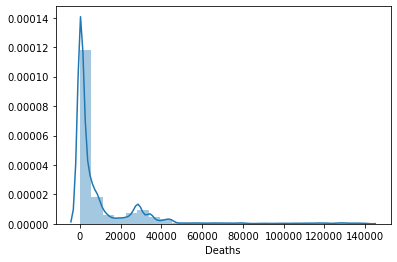

In [59]:
sns.distplot(df['Deaths'], bins=25)

In [60]:
df['Deaths'].mean()

10500.782975958415

In [61]:
df['Deaths'].median()

1588.0

In [62]:
df['Deaths'].max()

140534

# Question 4: Explore Data Visually

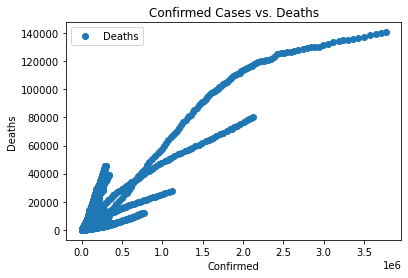

In [63]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Confirmed', y='Deaths',style='o') 
plt.title('Confirmed Cases vs. Deaths')  
plt.xlabel('Confirmed')  
plt.ylabel('Deaths')  
plt.show()

# Question 5: State your Hypothesis

# Hypothesis: Countries with stricter mask guidelines and more shutdowns have kept the virus at a lower rate.  Countries with more testing have lower death rates as compared to case counts.  With more testing, countries can prevent further spread of the virus and quickly get sick people the health care needed to prevent death.  

# Question 6: Reshape the variables into NumPy arrays

In [64]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Confirmed'].values.reshape(-1,1)
y = df['Deaths'].values.reshape(-1,1)

In [65]:
X

array([[     1],
       [     1],
       [     2],
       ...,
       [217799],
       [218717],
       [219641]])

In [66]:
y

array([[   0],
       [   0],
       [   0],
       ...,
       [5458],
       [5475],
       [5491]])

In [67]:
# Question 7: Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Question 8: Linear Regression 

In [68]:
# Create a regression object.

regression = LinearRegression()  

In [69]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [70]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

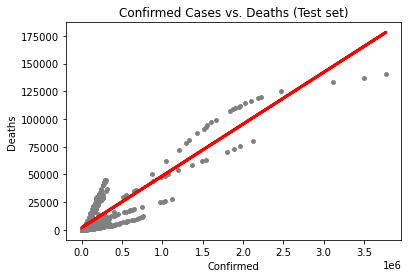

In [71]:
# Question 9: Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Confirmed Cases vs. Deaths (Test set)')
plot_test.xlabel('Confirmed')
plot_test.ylabel('Deaths')
plot_test.show()

# Question 10: Interpretation of how well the line fits: There are very few dots that match up with the regression line on this chart...it seems that every country either has a higher death rate to confirmed cases, or a lower death rate.  It seems like every individual country would have to have it's own regression line to be a good predictor.  

In [72]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)  

In [73]:
# Question 11: Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.04670692]]
Mean squared error:  79725467.9139603
R2 score:  0.7955996611620862


In [74]:
y_predicted

array([[  3497.87862507],
       [  9600.37159665],
       [  6984.17674137],
       [  2011.66434812],
       [  2131.14065611],
       [  2011.10386505],
       [  2011.10386505],
       [  4746.58820063],
       [  2660.75045141],
       [  2011.4308135 ],
       [ 14367.88730663],
       [ 35306.69411956],
       [ 54239.01824476],
       [  2948.93216382],
       [  8813.0797094 ],
       [  2327.87021408],
       [  8481.64738667],
       [ 12893.63000186],
       [ 11373.74003371],
       [ 10283.97411574],
       [  2125.16217002],
       [ 23407.59181248],
       [  2224.92815668],
       [  2011.15057197],
       [ 10715.54608051],
       [ 14431.73566982],
       [  2011.57093427],
       [ 58445.67722823],
       [ 13530.01182221],
       [  2011.19727889],
       [  7625.41608167],
       [  2013.11226272],
       [  2158.55761968],
       [  5530.09682716],
       [ 20462.53351521],
       [  2018.10990344],
       [  2011.10386505],
       [  3427.8649481 ],
       [  44

In [75]:
# Question 12: Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1009,3497.878625
1,21067,9600.371597
2,3302,6984.176741
3,0,2011.664348
4,115,2131.140656
5,0,2011.103865
6,0,2011.103865
7,1284,4746.588201
8,623,2660.750451
9,0,2011.430814


Compare how the regression fits the training set

In [76]:
# Predict.

y_predicted_train = regression.predict(X_train) 

In [77]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [78]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.04670692]]
Mean squared error:  81289600.85436396
R2 score:  0.8216820680260165


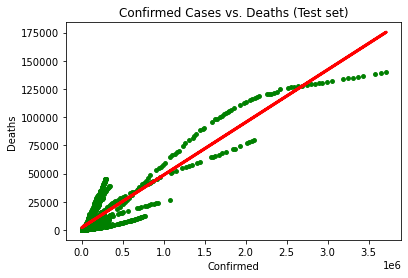

In [79]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Confirmed Cases vs. Deaths (Test set)')
plot_test.xlabel('Confirmed')
plot_test.ylabel('Deaths')
plot_test.show()

# Question 13: Thoughts... I feel as though it is very hard to predict the amount of deaths a country may have based only on the amount of cases.  There are many factors that may effect these numbers (amount of testing, mask mandates, shutdowns).  That is why the predicted figures are so different from the actual figures.  In terms of data bias, the reporting that each country has may not be universally accurate.  There have been many accusations that the figures are not being reported properly which can definitely alter the numbers.